## Procesos de Fabricación Aeronáutica - Máster Universitario en Ingeniería Aeronáutica
### Problema de estirado, examen parcial 17/12/2019

<img src="examen_2019_stretching.svg" alt="Stretching"/>

La figura adjunta muestra un esquema de un proceso de estirado para un componente del fuselaje de una aeronave. La chapa de partida se sujeta por dos de sus extremos enfrentados con un sistema de mordazas rotativo que evita la flexión de la chapa en la zona de cogida. El punzón tiene un radio $R=1.1$ m y se desplaza hacia arriba una distancia $s$. Los ejes de rotación de las mordazas (punto C) están separados una distancia $L=3$ m. Las dimensiones de la chapa, sin tener en cuenta la zona de cogida, son $l_0=2.4$ m, $w_0=2$ m y espesor $t_0=1.2$ mm. El material es una aleación de aluminio con una ley de comportamiento $\overline\sigma = 810 \overline\varepsilon^{0.24}$ MPa. El coeficiento de fricción es $\mu=0.1$.

Cuando se alcanza un ángulo $\theta=35°$, la fuerza del punzón es de $F=716.4$ kN/m. En esta situación se pide representar la distribución a lo largo de la chapa de las variables indicadas en cada apartado. Recuerde las ecuaciones de equilibrio: $T_1=p\,R$, $T_{1k} = T_{1j} \exp{(\mu\theta_{jk})}$.

1. Fuerza longitudinal por unidad de longitud ($T_1$).
2. Deformación longitudinal ($\varepsilon_1$).
3. Espesor ($t$).
4. Presión ($p$).
5. Calcule la fuerza máxima del punzón justo antes de que se produzca el fallo de la chapa. Si no puede calcularla directamente, al menos indique el procedimiento de cálculo. Indique también el tipo de fallo que se produciría así como su posición y su orientación en la chapa.

### Soluciones

La geometría del proceso indica un caso claro de deformación plana, $\beta=0$ (siempre exceptuando las zonas cercanas a los bordes libres de la chapa, que están en condiciones de tracción uniaxial, $\alpha=0$). En esa situación, la ley de comportamiento puede expresarse como:
$$
\begin{aligned}
\alpha = & \frac{2 \beta+1}{\beta+2} = \frac{1}{2} \\
\overline\sigma = & \sigma_1 \sqrt{1-\alpha+\alpha^2} = \frac{\sqrt{3}}{2}\sigma_1  \\
\overline\varepsilon = & \frac{2}{\sqrt{3}}\varepsilon_1 \sqrt{1+\beta+\beta^2} = \frac{2}{\sqrt{3}} \varepsilon_1 \\
\sigma_1 = & K' \varepsilon_1^n
\end{aligned}
$$
siendo $K' = (2/\sqrt{3})^{n+1}K$.

### Resolución con Python

Declaramos los parámetros del problema (unidades en mm, MPa, kN/m):

In [1]:
import math

R = 1100
l0 = 2400
w0 = 2000
t0 = 1.2

K = 810
n = 0.24
Kp = 810*(2/math.sqrt(3))**(n+1)
σ1 = lambda ε1: Kp*ε1**n
μ = 0.1

θ = math.radians(35)
F = 716.4

#### 1. Fuerza longitudinal por unidad de longitud ($T_1$).

La fuerza de reacción en B se puede calcular usando la ecuación de equilibrio:
$$
F = 2 T_{1,B} \sin\theta \quad\rightarrow\quad
T_{1,B} = \frac{F}{2  \sin \theta}
$$

La fuerza en todo el tramo AB es constante y, por tanto:
$$
T_{1,A} = T_{1,B}
$$

Con la ecuación de equilibrio para el tramo curvo OA, la fuerza en O se calcula como:
$$
T_{1,O} = T_{1,A} \mathrm{e}^{-\mu\theta}
$$

In [2]:
T1B = F/(2*math.sin(θ))
T1A = T1B
T1O = T1A*math.exp(-μ*θ)
print('T1O = %.1f kN/m' % T1O)
print('T1A = %.1f kN/m' % T1A)
print('T1B = %.1f kN/m' % T1B)

T1O = 587.5 kN/m
T1A = 624.5 kN/m
T1B = 624.5 kN/m


#### 2. Deformación longitudinal ($\varepsilon_1$).

La deformación en los puntos O, A y B se obtiene de la siguiente ecuación usando métodos numéricos:
$$
T_1 = \sigma_1 t = K' \varepsilon_1^n \cdot t_0\exp{(\varepsilon_1)}
$$

Usamos la función `fsolve` del módulo `scipy.optimize` para el cálculo numérico.


In [3]:
from scipy.optimize import fsolve

funcT1 = lambda ε1 : σ1(ε1)*t0*math.exp(-ε1)
funcO = lambda ε1 : T1O - funcT1(ε1)
funcA = lambda ε1 : T1A - funcT1(ε1)
ε1O = fsolve(funcO, 0.1)
ε1A = fsolve(funcA, ε1O)
ε1B = ε1A
print('ε1O = %.3f' % ε1O)
print('ε1A = %.3f' % ε1A)
print('ε1B = %.3f' % ε1B)

ε1O = 0.082
ε1A = 0.129
ε1B = 0.129


#### 3. Espesor ($t$).

Conocida la deformación, el espesor se calcula como:
$$
t = t_0\exp{(\varepsilon_1)}
$$


In [4]:
tO = t0*math.exp(-ε1O)
tA = t0*math.exp(-ε1A)
tB = tA
print('tO = %.3f mm' % tO)
print('tA = %.3f mm' % tA)
print('tB = %.3f mm' % tB)

tO = 1.105 mm
tA = 1.055 mm
tB = 1.055 mm


#### 4. Presión ($p$).

Conocida la fuerza longitudinal sobre la chapa, la presión del punzón en el tramo OA se calcula como:
$$
p = \frac{T_1}{R}
$$


In [5]:
pO = T1O/R
pA = T1A/R
print('pO = %.3f MPa' % pO)
print('pA = %.3f MPa' % pA)

pO = 0.534 MPa
pA = 0.568 MPa


#### 5. Fuerza máxima del punzón

El fallo se producirá por estricción localizada. Dado que toda la chapa está en deformación plana, el fallo se producirá en la zona de mayor deformación, es decir en el tramo AB, y a 90º con respecto a la dirección longitudinal de la chapa.

Según el modelo de Hill, la deformación límite en AB será $\varepsilon_1^* = n$ y, por consiguiente, la fuerza longitudinal en ese tramo es conocida:
$$T_{1}^* = K' n^n \cdot t_0 \mathrm{e}^{n}$$

In [6]:
print('T1* = %.1f kN/m' % funcT1(n))

T1* = 648.9 kN/m


Pero para calcular la fuerza como
$$F^* = 2 \, T_{1}^* \sin \theta^*$$
es necesario calcular antes el ángulo $\theta^*$. El valor de $\theta$ varía con el avance del punzón, al igual que el resto de variables. Es necesario usar métodos numéricos para calcular $\theta^*$. Un procedimiento de cálculo podría ser el siguiente:

1. Establecer un valor inicial $\theta_0$ (por ejemplo: 35°) y calcular $T_1$ y $\varepsilon_1$ en O, A y B.
2. Aumentar el ángulo: $\theta_{i+1} = \theta_i + \Delta\theta$.
     - Calcular $T_1$ y $\varepsilon_1$ en O, A y B.
     - Si en el tramo AB se tiene $\varepsilon_{1} < n$: repetir el punto 2.


### Explicación

En la práctica, cuando la sujeción con las mordazas (punto B) se realiza correctamente, el fallo sucede donde la chapa deja de estar en contacto con el punzón (punto A), justo donde se produce una inflexión en la distribución de $T_1$ y $p$. Además sucede en condiciones de deformacion plana, en una zona lejos de los bordes libres laterales (que están en tracción uniaxial). Al ser en deformacion plana, la orientación de la banda de estricción sería de 90° con respecto a la dirección 1 (es decir, alineada en la dirección perpendicular a la figura).

Para la resolución numérica del problema, además de las ecuaciones vistas en la asignatura para el análisis simple de estampación, habría que añadir una ecuación adicional para calcular la distribución de deformaciones en vez de suponer conocida la deformación en un punto (en general, el punto O). Esa ecuación adicional podría ser la deformación promedio en toda la chapa: $\overline\varepsilon_1 = \ln \, (l_{\text{OA}}+l_{\text{AB}})/l_0$, siendo $l_{\text{OA}}$ y $l_{\text{AB}}$ las longitudes de los tramos OA y AB, respectivamente.

### Procedimiento de cálculo de la fuerza máxima del punzón

El cálculo de la fuerza máxima del punzón puede resolverse planteando las siguientes ecuaciones:

- Una ecuación para la deformación longitudinal promedio a lo largo de la chapa:
    $$
    \overline\varepsilon_1 = \ln\frac{l_{\text{OA}}+l_{\text{AB}}}{l_0}
    $$
    siendo $l_{\text{OA}}$ y $l_{\text{AB}}$ las longitudes de los tramos OA y AB, respectivamente. Por otro lado, suponiendo una distribución lineal de la deformación en el tramo OA y sabiendo que en el tramo AB es constante, la deformación longitudinal promedio también puede expresarse como:
    $$
    \overline\varepsilon_1 \approx \frac{\frac{\varepsilon_{1,O}^*+\varepsilon_{1,A}^*}{2} l_{\text{OA}} + \varepsilon_{1,A}^* l_{\text{AB}}}{l_{\text{OA}}+l_{\text{AB}}}
    $$
    Igualando las expresiones anteriores se obtiene una ecuación con las siguientes variables:
    
    1. $\varepsilon_{1,O}^*$ es una incógnita a resolver.
    2. $\varepsilon_{1,A}^*=n$ es conocida.
    3. $l_{\text{OA}}$ es una función de $\theta^*$, en este caso $l_{\text{OA}} = R \theta^*$.
    4. $l_{\text{AB}}$ es una función de $\theta^*$ que se puede obtener por trigonometría.
    
    Por tanto, hay dos incógnitas: $\varepsilon_{1,O}^*$ y $\theta^*$ y la ecuación a resolver es:
    $$
    \ln\frac{R\theta^* + l_{\text{AB}}(\theta^*)}{l_0} = \frac{\frac{\varepsilon_{1,O}^*+n}{2} \cdot R\theta^* + n \cdot l_{\text{AB}}(\theta^*)}{R\theta^* + l_{\text{AB}}(\theta^*)}
    $$
    
- Una ecuación de equilibrio entre los puntos O y A:
    $$
    \begin{aligned}
    T_{1,A} = & T_{1,O} \mathrm{e}^{\mu\theta^*} \\
    K' n^n \cdot t_0 \mathrm{e}^{n} = & K' (\varepsilon_{1,O}^*)^n \cdot t_0 \mathrm{e}^{\varepsilon_{1,O}^*} \cdot \mathrm{e}^{\mu\theta^*} \\
    \left(\frac{n}{\varepsilon_{1,O}^*}\right)^n = & \exp{(\mu\theta^* + n - \varepsilon_{1,O}^*)}
    \end{aligned}
    $$

Resolviendo el sistema de dos ecuaciones se obtienen las dos incógnitas $\varepsilon_{1,O}^*$ y $\theta^*$ y, por tanto, se puede calcular la fuerza del punzón $F$:

$$
\theta = 38° \quad\rightarrow\quad
F_{\max} = 771.8\text{ kN/m}
$$

### Widget

El siguiente `widget` simula el proceso de estirado y muestra los valores de todas la variables en cada instante de tiempo. Cambie el ángulo mediante el control deslizante hasta un valor de 38° y compruebe cómo se alcanza la deformación límite en el tramo AB.

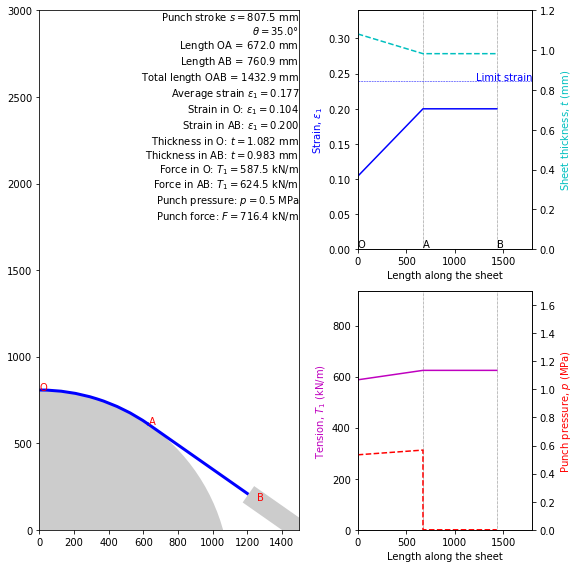

In [7]:
%matplotlib inline
from ipywidgets import interactive, fixed
import ipywidgets as widgets
from examen_2019_stretching import *

TL = 3000      # longitud total (chapa + 2 mordazas)
CL = (TL-l0)/2 # longitud de la mordaza
wa=widgets.FloatSlider(min=0, max=44, step=1, value=35, description='Angle θ (°):', readout=True, readout_format='.0f')
ip=interactive(plot_stretching, R=fixed(R), TL=fixed(TL), CL=fixed(CL), mu=fixed(μ), t0=fixed(t0), K=fixed(K), n=fixed(n), angle=wa, continuous_update=False)
ip

Comprobación:

In [8]:
θc = math.radians(38)
tc = t0*math.exp(-n)
T1c = σ1(n)*tc
Fc = 2*T1c*math.sin(θc)
print('Espesor crítico = %.3f mm' % tc)
print('Fuerza máxima del punzón = %.1f kN/m' % Fc)

Espesor crítico = 0.944 mm
Fuerza máxima del punzón = 799.0 kN/m
